In [ ]:
from pycaret.classification import *
import pandas as pd


Matplotlib is building the font cache; this may take a moment.


In [ ]:
import pandas as pd

# Load your local churn dataset
data = pd.read_csv(r"E:\Thapar MTech\SEM 1\EAI\Customer_Churn_Prediction\Churn_Modelling.csv")

# Display top rows
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from pycaret.classification import *

exp = setup(
    data=data,
    target='Exited',    # Make sure this column exists in your CSV
    session_id=123
)


,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 16)"
5,Transformed train set shape,"(7000, 16)"
6,Transformed test set shape,"(3000, 16)"
7,Numeric features,10
8,Categorical features,3
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8154,0.7777,0.3072,0.5892,0.4025,0.3065,0.3297,0.4490
gbc,Gradient Boosting Classifier,0.8146,0.7314,0.3682,0.5707,0.4462,0.3414,0.3538,1.0350
rf,Random Forest Classifier,0.8096,0.7490,0.3191,0.5571,0.4043,0.3013,0.3184,0.6270
lightgbm,Light Gradient Boosting Machine,0.8066,0.7022,0.3703,0.5362,0.4364,0.3249,0.3337,0.4460
ada,Ada Boost Classifier,0.8020,0.7064,0.3591,0.5213,0.4243,0.3098,0.3181,0.3870
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1020
lr,Logistic Regression,0.7866,0.7447,0.0897,0.3867,0.1448,0.0760,0.1022,1.3370
nb,Naive Bayes,0.7859,0.7482,0.0954,0.3978,0.1530,0.0805,0.1083,0.0950
ridge,Ridge Classifier,0.7674,0.6705,0.1361,0.3295,0.1922,0.0831,0.0944,0.1080
knn,K Neighbors Classifier,0.7610,0.5246,0.0912,0.2566,0.1343,0.0310,0.0366,0.1460


In [ ]:
model = create_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.7806,0.3451,0.5698,0.4298,0.3268,0.3415
1,0.8186,0.8048,0.3310,0.5949,0.4253,0.3279,0.3478
2,0.8057,0.7723,0.2746,0.5417,0.3645,0.2640,0.2853
3,0.8171,0.8061,0.3099,0.5946,0.4074,0.3117,0.3349
4,0.8214,0.7873,0.3846,0.5978,0.4681,0.3668,0.3797
5,0.8114,0.7412,0.2937,0.5753,0.3889,0.2910,0.3140
6,0.8143,0.7940,0.2587,0.6066,0.3627,0.2741,0.3083
7,0.7900,0.7426,0.2028,0.4677,0.2829,0.1818,0.2037
8,0.8314,0.7628,0.3287,0.6812,0.4434,0.3580,0.3911


In [ ]:
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
clf = setup(
    data=data,
    target='Exited',
    session_id=123,
    fix_imbalance=True,
    fix_imbalance_method='SMOTE'
)


,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(14148, 16)"
5,Transformed train set shape,"(11148, 16)"
6,Transformed test set shape,"(3000, 16)"
7,Numeric features,10
8,Categorical features,3
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8047,0.7657,0.3465,0.5299,0.4174,0.3070,0.3175,0.5750
lightgbm,Light Gradient Boosting Machine,0.8009,0.7003,0.4026,0.5150,0.4506,0.3316,0.3360,0.6340
gbc,Gradient Boosting Classifier,0.8001,0.7273,0.4187,0.5115,0.4596,0.3387,0.3417,2.2480
rf,Random Forest Classifier,0.7970,0.7302,0.3724,0.5014,0.4265,0.3068,0.3122,0.9770
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1120
ada,Ada Boost Classifier,0.7381,0.7038,0.4951,0.3943,0.4364,0.2700,0.2742,0.6590
dt,Decision Tree Classifier,0.7340,0.6227,0.4349,0.3732,0.4006,0.2316,0.2331,0.1850
ridge,Ridge Classifier,0.7160,0.6767,0.4299,0.3416,0.3800,0.1990,0.2017,0.1310
lda,Linear Discriminant Analysis,0.7119,0.6680,0.4173,0.3330,0.3696,0.1861,0.1886,0.1170
lr,Logistic Regression,0.7111,0.7448,0.6600,0.3793,0.4814,0.3008,0.3235,0.1890


In [ ]:
model = create_model(best_model)
tuned_model = tune_model(model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8043,0.7744,0.3944,0.5234,0.4498,0.3336,0.3386
1,0.8157,0.7922,0.4014,0.5644,0.4691,0.3615,0.3691
2,0.7857,0.7558,0.2676,0.4524,0.3363,0.2184,0.2291
3,0.8114,0.7939,0.3803,0.5510,0.4500,0.3408,0.3493
4,0.8071,0.7843,0.4336,0.5345,0.4788,0.3620,0.3650
5,0.8000,0.7228,0.3077,0.5176,0.3860,0.2756,0.2889
6,0.8057,0.7667,0.3007,0.5443,0.3874,0.2832,0.3008
7,0.7814,0.7273,0.2448,0.4375,0.3139,0.1961,0.2078
8,0.8171,0.7516,0.3776,0.5806,0.4576,0.3535,0.3654


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.5189,0.1901,0.2411,0.2126,0.0410,0.0415
1,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7971,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7957,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
final_model = finalize_model(tuned_model)


In [ ]:
predictions = predict_model(final_model)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9233,0.9769,0.7021,0.8994,0.7886,0.7426,0.7511


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
3564,3565,15803121,Chia,847,France,Male,51,5,97565.742188,1,0,0,144184.062500,1,1,0.77
1986,1987,15772601,Lu,845,Germany,Female,41,2,81733.742188,2,0,0,199761.296875,0,0,0.80
3684,3685,15714006,Gardener,482,France,Female,35,2,133111.734375,1,0,1,79957.953125,0,0,1.00
3334,3335,15702300,Walker,671,France,Male,27,5,0.000000,2,0,0,120893.070312,0,0,1.00
8346,8347,15793324,McKenzie,695,Spain,Male,32,9,0.000000,3,0,1,38533.789062,0,0,0.99


In [ ]:
final_model = finalize_model(tuned_model)


In [ ]:
predictions = predict_model(final_model)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9233,0.9769,0.7021,0.8994,0.7886,0.7426,0.7511


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
3564,3565,15803121,Chia,847,France,Male,51,5,97565.742188,1,0,0,144184.062500,1,1,0.77
1986,1987,15772601,Lu,845,Germany,Female,41,2,81733.742188,2,0,0,199761.296875,0,0,0.80
3684,3685,15714006,Gardener,482,France,Female,35,2,133111.734375,1,0,1,79957.953125,0,0,1.00
3334,3335,15702300,Walker,671,France,Male,27,5,0.000000,2,0,0,120893.070312,0,0,1.00
8346,8347,15793324,McKenzie,695,Spain,Male,32,9,0.000000,3,0,1,38533.789062,0,0,0.99


In [ ]:
save_model(final_model, "churn_model_v1")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RowNumber', 'CustomerId',
                                              'CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=na...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                   

In [ ]:
predictions.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'prediction_label',
       'prediction_score'],
      dtype='object')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predictions['Exited'], predictions['prediction_label'])
print("Final Test Accuracy:", accuracy)


Final Test Accuracy: 0.9233333333333333


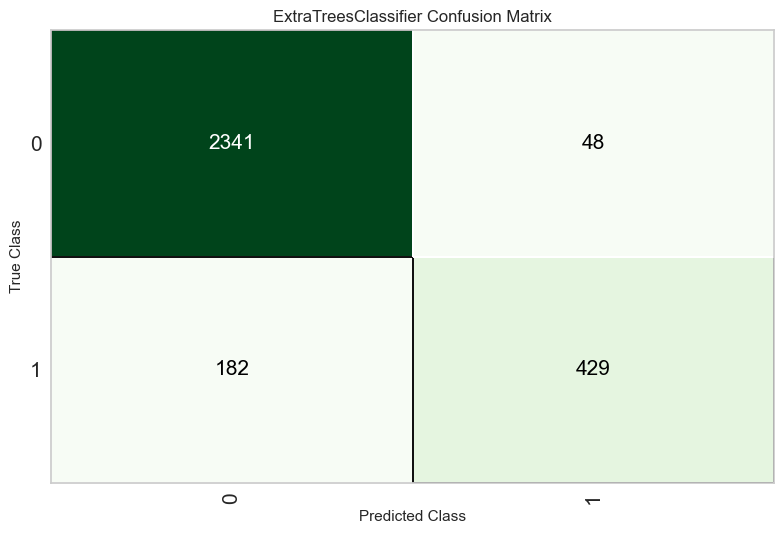

In [ ]:
plot_model(final_model, plot='confusion_matrix')


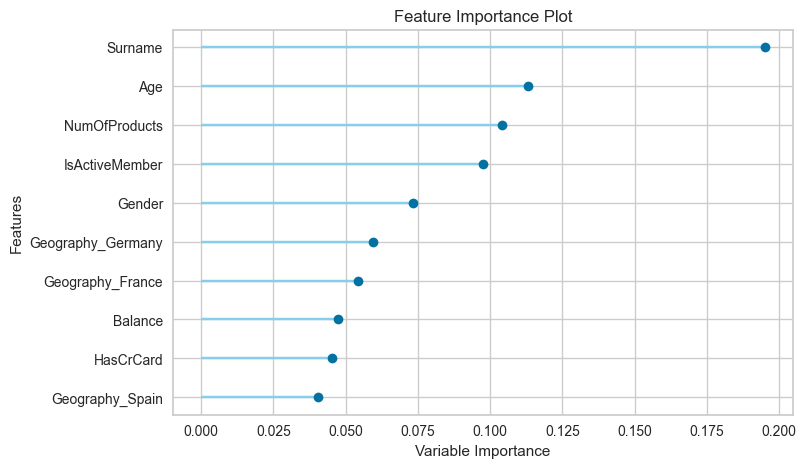

In [ ]:
plot_model(final_model, plot='feature')


In [ ]:
predictions.to_csv("final_churn_predictions.csv", index=False)
